# 4.9 Part 2 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\jmowe\OneDrive\5-9-2023 Instacart Basket Analysis'

In [3]:
df_combined = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_combined.pkl'))

### Step 2

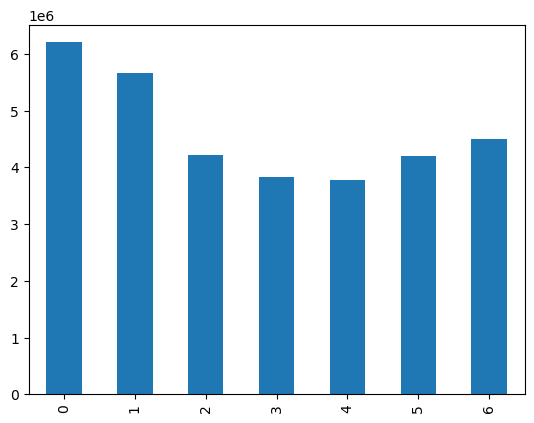

In [4]:
bar = df_combined['order_day_of_week'].value_counts().sort_index().plot.bar()

In [5]:
# reassigning the outlier values to be missing so they don't skew the following chart

df_combined.loc[df_combined['prices'] >100, 'prices'] = np.nan

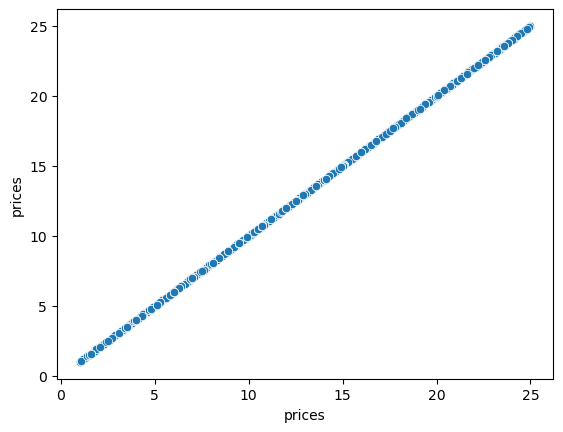

In [6]:
scatplt = sns.scatterplot(x = 'prices', y = 'prices',data = df_combined)

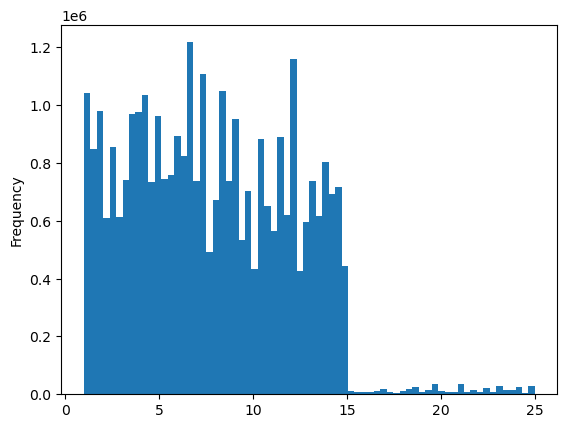

In [7]:
hist = df_combined['prices'].plot.hist(bins = 70)

In [8]:
# creating a subset for a line graph

np.random.seed(4)
dev = np.random.rand(len(df_combined)) <= 0.7

In [9]:
dev = np.random.rand(len(df_combined)) <= 0.7

In [10]:
big = df_combined[dev]

In [11]:
small = df_combined[~dev]

In [13]:
df_2 = small[['order_day_of_week','prices']]

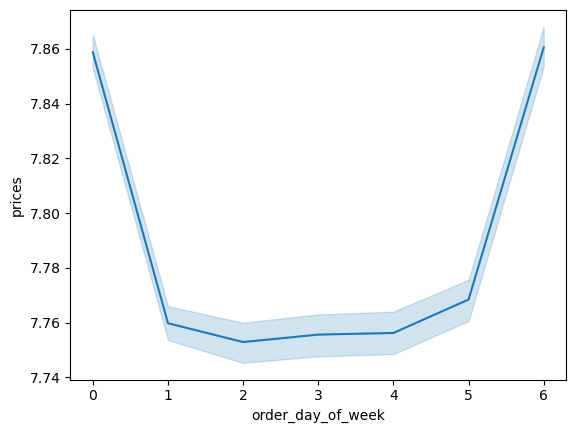

In [14]:
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

In [15]:
# exporting all of the graphs

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_ords_dow.png'))

In [16]:
scatplt.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatplt_prices.png'))

In [17]:
hist.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'hist_prices_70.png' ))

In [18]:
line.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'line_ords_dow.png' ))

### Step 3

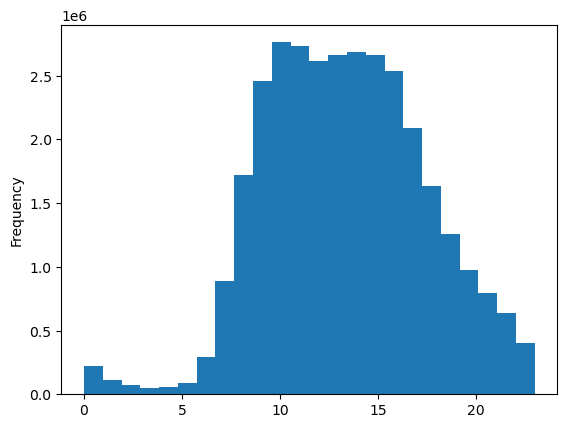

In [20]:
hist_hour = df_combined['order_hour_of_day'].plot.hist(bins = 24)

In [21]:
# This graph shows the rate of shoppers versus the time of day. 0-24 is the hour of day and the vertial bars are the amount of orders. 9am-3pm looks to be the busiest time of day.

In [22]:
hist_hour.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'hist_ords_hour.png' ))

### Step 4

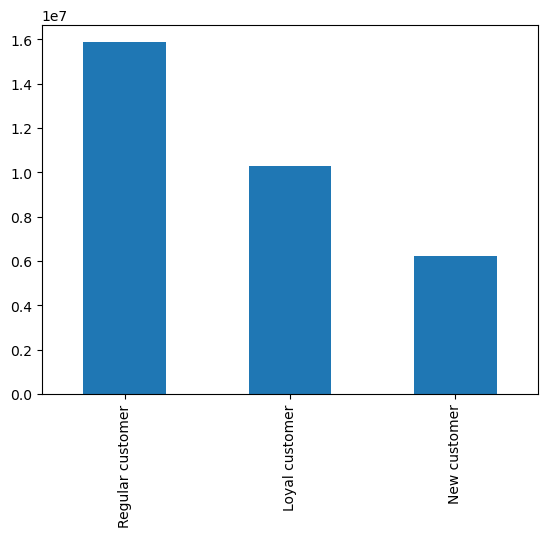

In [25]:
loyalty_distribution_bar = df_combined['loyalty_flag'].value_counts().plot.bar()

In [27]:
loyalty_distribution_bar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'loyaty_distribution.png' ))

### Step 5

In [28]:
#using our small data subset previously created to represent this graph

df_3 = small[['prices', 'order_hour_of_day'] ]

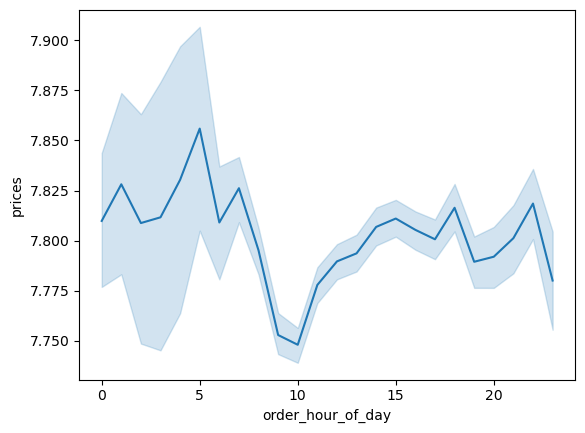

In [29]:
line_hour = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

In [30]:
line_hour.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'spending_per_hour.png' ))

### Step 6

In [34]:
df_4 = small[['Age', 'Number of Dependants']]

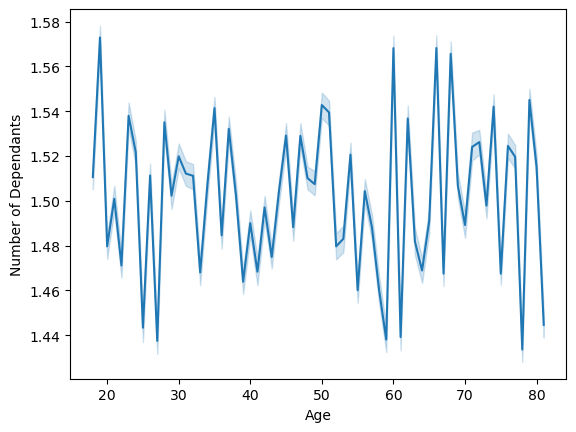

In [35]:
line_age = sns.lineplot (data = df_4, x = 'Age', y = 'Number of Dependants')

In [36]:
# There is very little pattern discernible from this graph. This being exploratory analysis, I would qualify this relationship as not worth using in a targeted campaign.

### Step 7

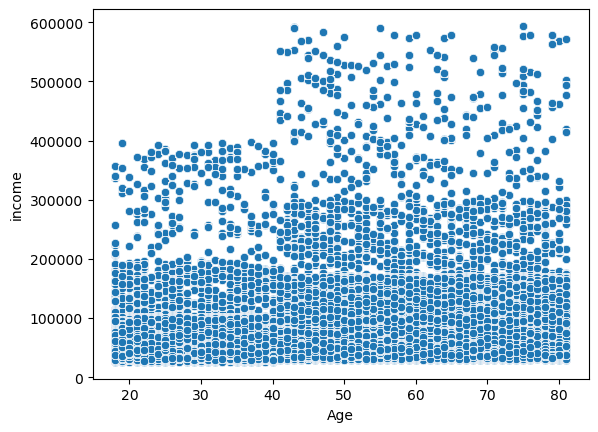

In [38]:
scatter_income = sns.scatterplot(data = df_combined, x= 'Age', y = 'income')

In [39]:
scatter_income.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'income_and_age_scatter.png'))

In [40]:
# notable observations is the spike in income around age 40 and the satuartion of more middle-class-leaning incomes from 40-80.